<a href="https://colab.research.google.com/github/dAn-solution/competition/blob/main/Prob_kiva_001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Kiva／クラウドファンディングの資金調達額予測
- EDA
- Tutorialの実行

### Google Driveのマウント

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/'My Drive'/'Probdata'/'kiva'

Mounted at /content/drive
/content/drive/My Drive/Probdata/kiva


### ライブラリのインストール、インポート

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from src.common_functions import Config

### データの読み込み

In [ ]:
train_df = pd.read_csv(f'{Config.input_dir_name}/train.csv')
test_df = pd.read_csv(f'{Config.input_dir_name}/test.csv')
submit_df = pd.read_csv(f'{Config.input_dir_name}/sample_submission.csv')

In [ ]:
print(train_df.shape)
print(test_df.shape)
print(submit_df.shape)

(91333, 18)
(91822, 17)
(91822, 2)


In [ ]:
train_df.head()

,LOAN_ID,ORIGINAL_LANGUAGE,DESCRIPTION,DESCRIPTION_TRANSLATED,LOAN_AMOUNT,IMAGE_ID,ACTIVITY_NAME,SECTOR_NAME,LOAN_USE,COUNTRY_CODE,COUNTRY_NAME,TOWN_NAME,CURRENCY_POLICY,CURRENCY_EXCHANGE_COVERAGE_RATE,CURRENCY,TAGS,REPAYMENT_INTERVAL,DISTRIBUTION_MODEL
0,1733169,English,Teodora is a 50-year-old married woman from th...,Teodora is a 50-year-old married woman from th...,100,3115271,Weaving,Arts,"to purchase materials like nipa palm, bamboo ...",PH,Philippines,"Maribojoc, Bohol",shared,0.1,PHP,#Elderly,monthly,field_partner
1,1546998,English,Diego is 32 years old and lives in the municip...,Diego is 32 years old and lives in the municip...,1350,2870403,Barber Shop,Services,"to buy two hair clippers, a new barber chair, ...",CO,Colombia,Apartadó,shared,0.1,COP,"user_favorite, user_favorite",monthly,field_partner
2,1808517,Spanish,"Osman, es un joven de 27 años de edad, soltero...","Osman is a young man, 27 years old, single, an...",225,3215705,Farming,Agriculture,to purchase sacks of fertilizers to care for a...,HN,Honduras,"Nueva Frontera, Santa Barbara.",shared,0.1,HNL,NaN,bullet,field_partner
3,1452940,English,"His name is Nino, 31 years old, married to Che...","His name is Nino, 31 years old, married to Che...",350,2745031,Motorcycle Transport,Transportation,"to pay for fuel, tires and change oil for his ...",PH,Philippines,"Silang, Cavite",shared,0.1,PHP,user_favorite,monthly,field_partner
4,1778420,English,"Pictured above is Teresa, often described as a...","Pictured above is Teresa, often described as a...",625,3083800,Farming,Agriculture,to purchase hybrid seeds and fertilizer to imp...,KE,Kenya,Mumias,shared,0.1,KES,"#Eco-friendly, #Sustainable Ag, #Parent, #Elde...",bullet,field_partner


In [ ]:
train_df.columns

Index(['LOAN_ID', 'ORIGINAL_LANGUAGE', 'DESCRIPTION', 'DESCRIPTION_TRANSLATED',
       'LOAN_AMOUNT', 'IMAGE_ID', 'ACTIVITY_NAME', 'SECTOR_NAME', 'LOAN_USE',
       'COUNTRY_CODE', 'COUNTRY_NAME', 'TOWN_NAME', 'CURRENCY_POLICY',
       'CURRENCY_EXCHANGE_COVERAGE_RATE', 'CURRENCY', 'TAGS',
       'REPAYMENT_INTERVAL', 'DISTRIBUTION_MODEL'],
      dtype='object')

In [ ]:
test_df.columns

Index(['LOAN_ID', 'ORIGINAL_LANGUAGE', 'DESCRIPTION', 'DESCRIPTION_TRANSLATED',
       'IMAGE_ID', 'ACTIVITY_NAME', 'SECTOR_NAME', 'LOAN_USE', 'COUNTRY_CODE',
       'COUNTRY_NAME', 'TOWN_NAME', 'CURRENCY_POLICY',
       'CURRENCY_EXCHANGE_COVERAGE_RATE', 'CURRENCY', 'TAGS',
       'REPAYMENT_INTERVAL', 'DISTRIBUTION_MODEL'],
      dtype='object')

In [ ]:
submit_df.head()

,LOAN_ID,LOAN_AMOUNT
0,2041445,100
1,1944435,100
2,2083354,100
3,1993565,100
4,2064272,100


In [ ]:
train_df['LOAN_AMOUNT'].describe()

count    91333.000000
mean       738.149957
std       1013.752868
min         25.000000
25%        225.000000
50%        450.000000
75%        825.000000
max      10000.000000
Name: LOAN_AMOUNT, dtype: float64

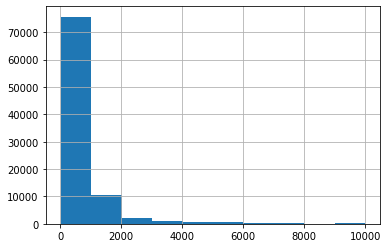

In [ ]:
train_df['LOAN_AMOUNT'].hist()

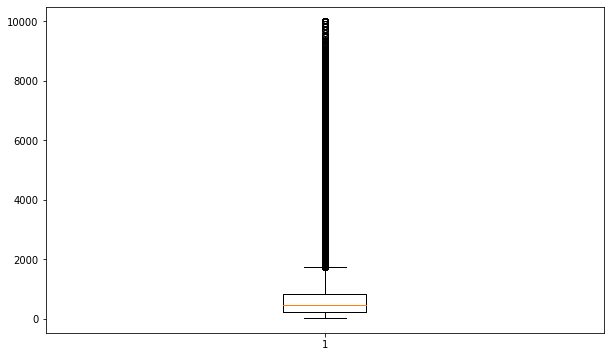

In [ ]:
plt.figure(figsize=(10,6))
plt.boxplot(train_df['LOAN_AMOUNT'])
plt.show()

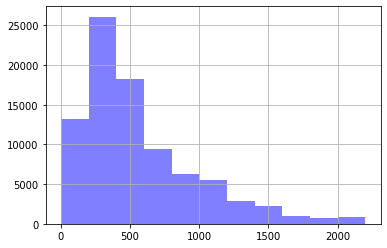

In [ ]:
x_095 = int(train_df['LOAN_AMOUNT'].quantile(0.95))
train_df['LOAN_AMOUNT'].hist(bins=list(range(0,x_095,200)), color='blue', alpha=0.5)

### 予測モデルの作成、学習

In [ ]:
train_columns = ['ORIGINAL_LANGUAGE','ACTIVITY_NAME']
target = 'LOAN_AMOUNT'

X = pd.get_dummies(train_df[train_columns], drop_first=True)
y = train_df[target]

In [ ]:
#scikit-learnライブラリをimport
import sklearn
from sklearn.ensemble import RandomForestRegressor as RFR

#回帰モデルのインスタンス化
model = RFR()

#予測モデルの作成
result = model.fit(X, y)

### 予測モデルの評価

In [ ]:
model.score(X, y)

0.1466142343611735

In [ ]:
from sklearn.metrics import mean_absolute_error
y_true = y
y_pred = model.predict(X)
print(mean_absolute_error(y_true, y_pred))

494.1966205948083


### 提出データの作成

In [ ]:
#説明変数の作成
test_X = pd.get_dummies(test_df[train_columns], drop_first=True)

#テスト結果の出力
test_predicted = model.predict(test_X) 

In [ ]:
submit_df['LOAN_AMOUNT']=test_predicted
submit_df.to_csv(f'{Config.submission_dir_name}/submission.csv',index=False)